# Projet sur Segmentation des clients de l'entreprise Brésilienne OLIST

###  Rédigé par  Mamadou NDIAYE et Mamadou DIALLO élèves ITS à l'ENSAE de DAKAR

#### Installation de package

In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [264]:
#Vérifier le répertoire de travail
import os
print(os.getcwd()) 
#modifie le répertoire de travail 
pwd = "C:\ENSAE DE DAKAR\ITS4\ITS4 DIALLO\Machine learning\projet"
os.chdir(pwd)
 
#affiche le nouveau repertoire de travail 
print(os.getcwd()) 

C:\ENSAE DE DAKAR\ITS4\ITS4 DIALLO\Machine learning\projet
C:\ENSAE DE DAKAR\ITS4\ITS4 DIALLO\Machine learning\projet


# Importation des données

In [110]:
# Importation des donnés
#les données que nous allons utiliser sont réparties en 11 bases
customers= pd.read_csv('Bases/olist_customers_dataset.csv', sep=",")
geolocalisation = pd.read_csv('Bases/olist_geolocation_dataset.csv', sep=";")
order_items = pd.read_csv('Bases/olist_order_items_dataset.csv', sep=";")
order_payments = pd.read_csv('Bases/olist_order_payments_dataset.csv', sep=";")
order_reviews = pd.read_csv('Bases/olist_order_reviews_dataset.csv', sep=";")
orders = pd.read_csv('Bases/olist_orders_dataset.csv', sep=";")
products = pd.read_csv('Bases/olist_products_dataset.csv', sep=";")
sellers = pd.read_csv('Bases/olist_sellers_dataset.csv', sep=";")
translation = pd.read_csv('Bases/product_category_name_translation.csv', sep="\t")

## visualisation des bases

In [111]:
customers.head(5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [112]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [113]:
geolocalisation.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [114]:
geolocalisation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [115]:

order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14


In [116]:

order_payments.head(6)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12


In [117]:

order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00:00,11/03/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00:00,18/02/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/04/2017 00:00,21/04/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01/03/2018 00:00,02/03/2018 10:26


In [118]:

orders.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2017 10:56,02/10/2017 11:07,04/10/2017 19:55,10/10/2017 21:25,18/10/2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2018 20:41,26/07/2018 03:24,26/07/2018 14:31,07/08/2018 15:27,13/08/2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2018 08:38,08/08/2018 08:55,08/08/2018 13:50,17/08/2018 18:06,04/09/2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 00:28,15/12/2017 00:00


In [119]:

products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [120]:

sellers.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [121]:
translation.head(6)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure


# Valeurs manquantes

In [122]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

La Base client ne contient pas de valeurs abberrantes

In [123]:
customers.duplicated().sum()

0

La base client ne contient pas aussi de doublons

In [124]:
geolocalisation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              1
dtype: int64

La base geolocalisation ne contient qu'une seule valeur manquante

In [125]:
geolocalisation.duplicated().sum()

271585

On a des doublons au niveau de la base geolocalisation.

In [126]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [127]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [128]:
order_reviews.isna().sum()

review_id                   1859
order_id                    1459
review_score                1607
review_comment_title       91491
review_comment_message     62820
review_creation_date        9320
review_answer_timestamp     9338
dtype: int64

In [129]:
order_reviews.review_score

0         4
1         5
2         5
3         5
4         5
         ..
103326    5
103327    5
103328    5
103329    4
103330    1
Name: review_score, Length: 103331, dtype: object

Pour order_reviews les valeurs manquantes correspondent à des commataires vides

In [130]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [131]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [132]:
products[products['product_category_name'].isna()].sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
29369,dc8128d60372ee4869b22114e3bc4957,NaN,NaN,NaN,NaN,200.0,25.0,5.0,15.0
6039,0082684bb4a60a862baaf7a60a5845ed,NaN,NaN,NaN,NaN,500.0,24.0,4.0,15.0
15092,7dc0fd89c290eb0b3e5253d19be59f6f,NaN,NaN,NaN,NaN,800.0,20.0,25.0,20.0
22445,99c3deeef8923c1036a30a5abed9071c,NaN,NaN,NaN,NaN,1000.0,40.0,28.0,25.0
10795,75f54c6aa3a4ccb9ab44fae693c21418,NaN,NaN,NaN,NaN,850.0,30.0,24.0,18.0


In [133]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Il y'a des produits dont leur catégorie n'est pas renseigné

In [134]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [135]:
translation.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

## Nettoyage des bases 

* La Base geolocalisation

In [136]:
geolocalisation_df=geolocalisation.copy()

In [137]:
geolocalisation_df.drop_duplicates(inplace=True)

In [138]:
geolocalisation_df.duplicated().sum()

0

Il n' y a plus de doublons sur la base ci-dessus.

* La base order_reviews

In [139]:
order_reviews_df=order_reviews.copy()

On va attribuer une note de 3 pour les notes score qui ne sont pas renseignées car on fait l'hypothèse que si le client n'a pas donné une note, c'est parcequ'il est satisfait de la commande.

In [140]:
order_reviews_df['review_score'].fillna(3,inplace=True)

In [141]:
order_reviews_df['review_comment_title'].fillna('NO COMMENT TITLE',inplace=True)
order_reviews_df['review_comment_message'].fillna('NO COMMENT MESSAGE',inplace=True)

In [146]:
order_reviews_df['review_creation_date'].fillna(0,inplace=True)
order_reviews_df['review_answer_timestamp'].fillna(0,inplace=True)

In [147]:
order_reviews_df.isna().sum()

review_id                  1859
order_id                   1459
review_score                  0
review_comment_title          0
review_comment_message        0
review_creation_date          0
review_answer_timestamp       0
dtype: int64

* La Base orders

In [148]:
orders_df=orders.copy()

In [149]:
orders_df['order_delivered_carrier_date'].fillna(0, inplace=True)
orders_df['order_delivered_customer_date'].fillna(0, inplace=True)
orders_df['order_approved_at'].fillna(0, inplace=True)

In [150]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Il n'y a plus de valeurs manquantes sur la base orders

#### conversion en datetime

In [250]:
datetime_col=["order_purchase_timestamp", "order_delivered_customer_date"]
for col in datetime_col:
    order_items[col]=order_items[col].astype('datetime64[ns]')

* La base products

In [151]:
products_df=products.copy()

In [152]:
products_df=products_df.drop(columns=['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'])
products_df['product_category_name'].fillna('Inconnue', inplace=True)


In [153]:
products_df.isna().sum()

product_id               0
product_category_name    0
dtype: int64

La base products est nettoyée.

# Analyse Exploratoire sur les base

#### Répartition  des clients par géographie

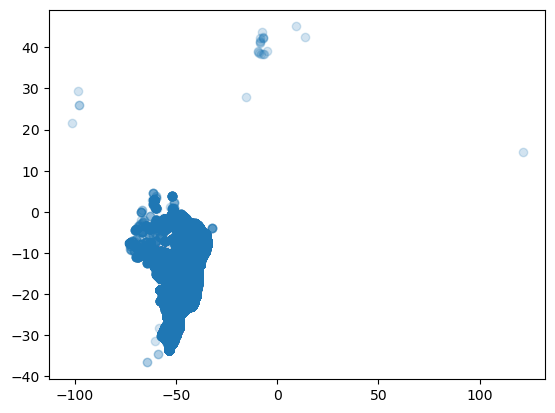

In [154]:
plt.scatter(x=geolocalisation_df["geolocation_lng"],
           y=geolocalisation_df["geolocation_lat"],
           alpha=0.2)

Les clients se localisent plus dans le Sud.

In [238]:
customers.customer_state.describe()

count     99441
unique       27
top          SP
freq      41746
Name: customer_state, dtype: object

<AxesSubplot:>

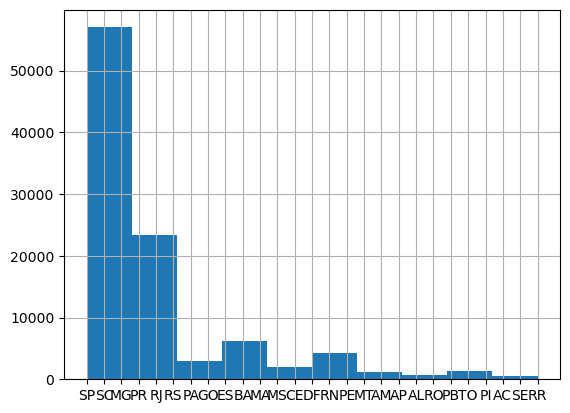

In [155]:
customers.customer_state.hist()

Il y'a 27 Etats et celui le plus représenté est celle de Sao Polo.

#### Nombre de produits par commande

In [239]:
order_items['order_id'].nunique()

96478

On a 96478 valeurs uniques pour 'order_id'. Ceux qui ne sont pas unique représentent des commandes de plusieurs produits.

In [240]:
order_items['order_item_id'].describe()

count    115708.000000
mean          1.197065
std           0.701259
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: order_item_id, dtype: float64

En moyenne les commandes contiennent un seul produit, ce qui représente la valeur minimal de produits par commande. 
Au maximum les commandes contienent 21 produits.

In [241]:
order_items['product_id'].nunique()

32216

Il y'a 32 216 produits différents.

#### Etat des commandes

<AxesSubplot:>

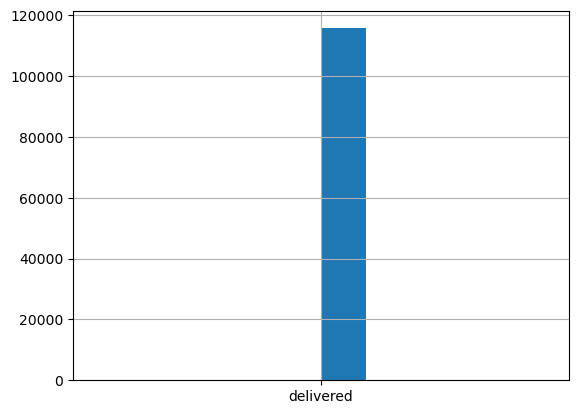

In [246]:
order_items.order_status.hist()

La plupart des commandes sont délévrées.

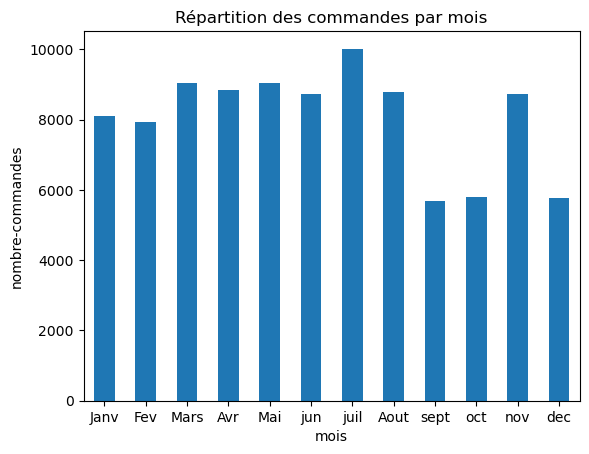

In [253]:
order_items.groupby(order_items['order_purchase_timestamp'].dt.month)\
.agg({"order_id":"nunique"})\
.plot(kind="bar", title="Répartition des commandes par mois",
     ylabel="nombre-commandes",
     xlabel="mois", legend=False)
plt.xticks(np.arange(0,12), ['Janv','Fev', 'Mars','Avr', 'Mai','jun','juil','Aout','sept','oct','nov','dec'],
                             rotation='horizontal')
plt.show()

On a plus de commandes au mois de juillet et moins de commande au mois de septembre.

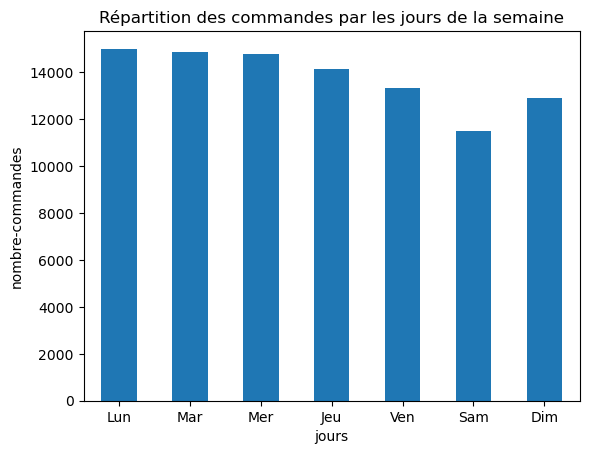

In [254]:
order_items.groupby(order_items['order_purchase_timestamp'].dt.dayofweek)\
.agg({"order_id":"nunique"})\
.plot(kind="bar", title="Répartition des commandes par les jours de la semaine",
     ylabel="nombre-commandes",
     xlabel="jours", legend=False)
plt.xticks(np.arange(0,7), ['Lun','Mar', 'Mer','Jeu', 'Ven','Sam','Dim'],
                             rotation='horizontal')
plt.show()

Il y'a plus de commandes pour les jours de lundi, mardi et mercredi que les autres jours et moins de commandes le samedi.

#### Type de paiement

<AxesSubplot:>

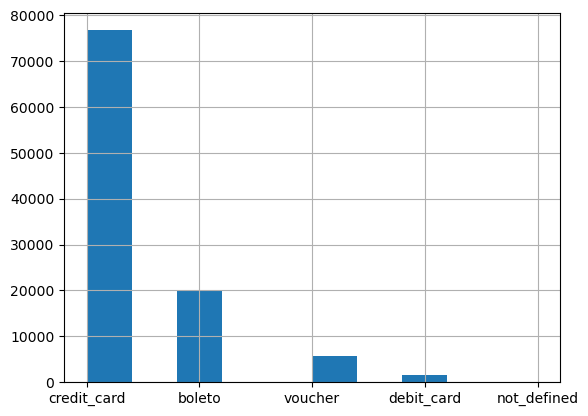

In [262]:
order_payments.payment_type.hist()

Le paiement par carte bancaire est le plus utilisé suivi de boleto.

#### Niveau satisfaction des clients

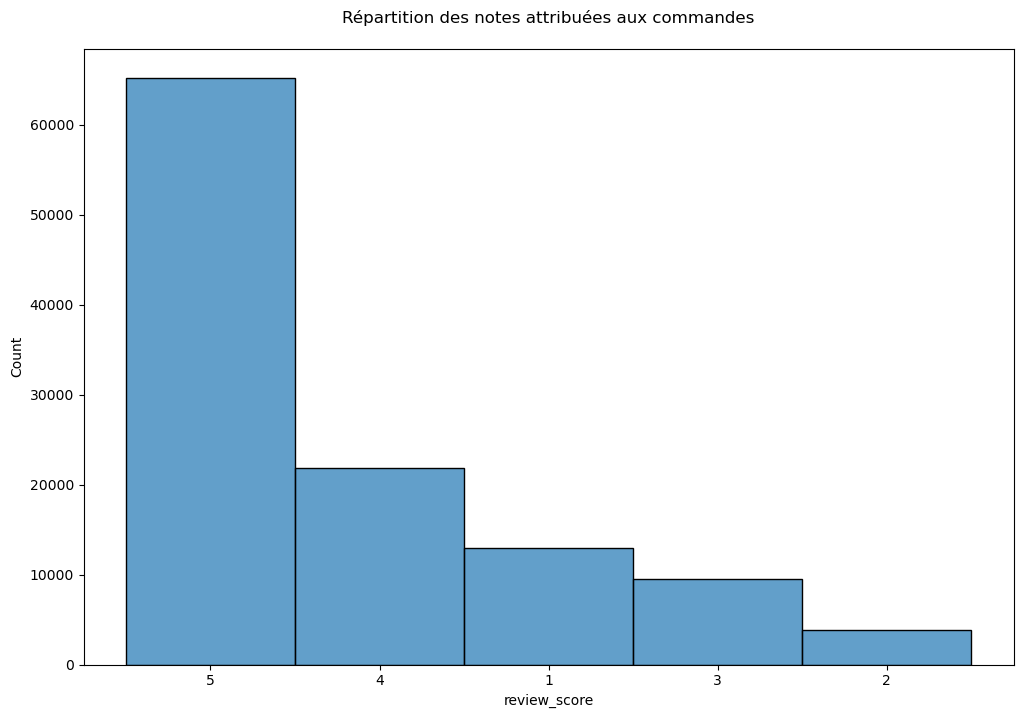

In [260]:
fig=plt.figure(figsize=(12,8))
sns.histplot(data=order_items, x="review_score",
            discrete=True,
            alpha=0.7)
plt.title(f"Répartition des notes attribuées aux commandes\n")
plt.show()

La plupart des clients sont satisfaits des commandes qu'ils ont fait

#### Dépenses des clients

# Jointure de Bases

##### produits et catégoris

In [157]:
translation_df=translation.copy()
products = pd.merge(products_df, translation_df,
                    how="left",
                    on="product_category_name").drop(
        ['product_category_name'], axis=1)
    


In [158]:
products.head()

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [159]:
products.isna().sum()

product_id                         0
product_category_name_english    623
dtype: int64

##### imputation des valeurs manquantes dans la base products

In [161]:
products['product_category_name_english'].fillna('Non traduit', inplace=True)

In [162]:
products.isna().sum()

product_id                       0
product_category_name_english    0
dtype: int64

#### Commandes et commandes_libellé


In [163]:
order_items_df= order_items.copy()
order_items = pd.merge(order_items_df,orders_df,
                       how="left",
                       on="order_id")
    

In [164]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,13/09/2017 08:59,13/09/2017 09:45,19/09/2017 18:34,20/09/2017 23:43,29/09/2017 00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,26/04/2017 10:53,26/04/2017 11:05,04/05/2017 14:35,12/05/2017 16:04,15/05/2017 00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,14/01/2018 14:33,14/01/2018 14:48,16/01/2018 12:36,22/01/2018 13:19,05/02/2018 00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,08/08/2018 10:00,08/08/2018 10:10,10/08/2018 13:28,14/08/2018 13:32,20/08/2018 00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,04/02/2017 13:57,04/02/2017 14:10,16/02/2017 09:46,01/03/2017 16:42,17/03/2017 00:00


#### suppression des commandes qui ne sont pas encore délivrées 

In [165]:
order_items = order_items[order_items["order_status"] == "delivered"]
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,13/09/2017 08:59,13/09/2017 09:45,19/09/2017 18:34,20/09/2017 23:43,29/09/2017 00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,26/04/2017 10:53,26/04/2017 11:05,04/05/2017 14:35,12/05/2017 16:04,15/05/2017 00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,14/01/2018 14:33,14/01/2018 14:48,16/01/2018 12:36,22/01/2018 13:19,05/02/2018 00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,08/08/2018 10:00,08/08/2018 10:10,10/08/2018 13:28,14/08/2018 13:32,20/08/2018 00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,04/02/2017 13:57,04/02/2017 14:10,16/02/2017 09:46,01/03/2017 16:42,17/03/2017 00:00


#### regroupement commandes et les paiements

In [166]:
order_payments_df=order_payments.copy()
order_items = pd.merge(order_items, order_payments_df,
                       how="left",
                       on="order_id").drop(
        ['seller_id'], axis=1)


#### regroupement avis des clients et commandes

In [167]:
order_items = pd.merge(order_items, order_reviews_df,
                       how="left",
                       on="order_id")
order_items.head(5)

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,19/09/2017 09:45,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,13/09/2017 08:59,13/09/2017 09:45,19/09/2017 18:34,20/09/2017 23:43,29/09/2017 00:00,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5,NO COMMENT TITLE,"Perfeito, produto entregue antes do combinado.",21/09/2017 00:00,22/09/2017 10:57
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,03/05/2017 11:05,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,26/04/2017 10:53,26/04/2017 11:05,04/05/2017 14:35,12/05/2017 16:04,15/05/2017 00:00,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4,NO COMMENT TITLE,NO COMMENT MESSAGE,13/05/2017 00:00,15/05/2017 11:34
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,18/01/2018 14:48,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,14/01/2018 14:33,14/01/2018 14:48,16/01/2018 12:36,22/01/2018 13:19,05/02/2018 00:00,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5,NO COMMENT TITLE,Chegou antes do prazo previsto e o produto sur...,23/01/2018 00:00,23/01/2018 16:06
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,15/08/2018 10:10,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,08/08/2018 10:00,08/08/2018 10:10,10/08/2018 13:28,14/08/2018 13:32,20/08/2018 00:00,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4,NO COMMENT TITLE,NO COMMENT MESSAGE,15/08/2018 00:00,15/08/2018 16:39
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,13/02/2017 13:57,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,04/02/2017 13:57,04/02/2017 14:10,16/02/2017 09:46,01/03/2017 16:42,17/03/2017 00:00,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5,NO COMMENT TITLE,Gostei pois veio no prazo determinado .,02/03/2017 00:00,03/03/2017 10:54


#### la base globale ( )

In [170]:
data_p_o = pd.merge(order_items, products,
               how="left",
               on="product_id")
data=pd.merge(customers, data_p_o,
              how="left",
              on="customer_id")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118671 entries, 0 to 118670
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118671 non-null  object 
 1   customer_unique_id             118671 non-null  object 
 2   customer_zip_code_prefix       118671 non-null  int64  
 3   customer_city                  118671 non-null  object 
 4   customer_state                 118671 non-null  object 
 5   order_id                       115708 non-null  object 
 6   order_item_id                  115708 non-null  float64
 7   product_id                     115708 non-null  object 
 8   shipping_limit_date            115708 non-null  object 
 9   price                          115708 non-null  float64
 10  freight_value                  115708 non-null  float64
 11  order_status                   115708 non-null  object 
 12  order_purchase_timestamp      

# Nettoyage de la base totale

In [171]:
data.shape

(118671, 28)

In [172]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                         2963
order_item_id                    2963
product_id                       2963
shipping_limit_date              2963
price                            2963
freight_value                    2963
order_status                     2963
order_purchase_timestamp         2963
order_approved_at                2963
order_delivered_carrier_date     2963
order_delivered_customer_date    2963
order_estimated_delivery_date    2963
payment_sequential               2966
payment_type                     2966
payment_installments             2966
payment_value                    2966
review_id                        5373
review_score                     5373
review_comment_title             5373
review_comment_message           5373
review_creation_date             5373
review_answe

In [173]:
#suppression de certaines colonnes 
data=data.drop(columns=['shipping_limit_date',
                        'order_purchase_timestamp','order_approved_at',
                        'order_delivered_carrier_date','order_delivered_customer_date',
                        'order_estimated_delivery_date'
                       ])

In [176]:
data=data.drop(columns=['review_comment_title','review_comment_message','review_creation_date',
                       'review_answer_timestamp'])

In [177]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                         2963
order_item_id                    2963
product_id                       2963
price                            2963
freight_value                    2963
order_status                     2963
payment_sequential               2966
payment_type                     2966
payment_installments             2966
payment_value                    2966
review_id                        5373
review_score                     5373
product_category_name_english    2963
dtype: int64

In [180]:
# Suppression des lignes dont toutes les variables sont des Na
data.dropna(how='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,price,freight_value,order_status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,delivered,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,delivered,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,delivered,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,delivered,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,delivered,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118666,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,1.0,ccb4503d9d43d245d3b295d0544f988b,74.90,13.88,delivered,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,books_general_interest
118667,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,9ede6b0570a75a4b9de4f383329f99ee,114.90,14.16,delivered,1.0,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5,sports_leisure
118668,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,37.00,19.04,delivered,1.0,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1,health_beauty
118669,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,1.0,f819f0c84a64f02d3a5606ca95edd272,689.00,22.07,delivered,1.0,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5,watches_gifts


In [190]:
#Imputation des valeurs manquantes
data['price'].fillna(data['price'].mean(), inplace=True)


In [192]:
data['freight_value'].fillna(data['freight_value'].mean(), inplace=True)

In [193]:
data['payment_value'].fillna(data['payment_value'].mean(), inplace=True)


In [208]:
data['review_score'].fillna(data['review_score'].median(), inplace=True)

In [209]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                         2963
order_item_id                    2963
product_id                       2963
price                               0
freight_value                       0
order_status                     2963
payment_sequential                  0
payment_type                     2966
payment_installments             2966
payment_value                       0
review_id                        5373
review_score                        0
product_category_name_english    2963
dtype: int64

In [210]:
data.duplicated().sum()

0

## Creations des variables

A présent, nous allons créer de nouvelles variables pour mieux faire nos analyses :
   * Nombre de produits achetés par client
   * catégorie de produit le plus acheté
   * montant maximum des achats
   * nombre moyen de produits par commande
   * score moyen donné par le client
   * moyen de paiement le plus utilisé 
   * montant dépense par catégorie de produit
   * nombre de moyens de paiement différents utilisés sur la commande
   * nombre d'échéances totales de la commande.

#### nombre de produits achetés par client

In [211]:

nb_produits_client =data.groupby('customer_id')['product_id'].count()
nb_produits_client.rename('Nb_tot_pdts', inplace=True)

customer_id
00012a2ce6f8dcda20d059ce98491703    1
000161a058600d5901f007fab4c27140    1
0001fd6190edaaf884bcaf3d49edf079    1
0002414f95344307404f0ace7a26f1d5    1
000379cdec625522490c315e70c7a9fb    1
                                   ..
fffecc9f79fd8c764f843e9951b11341    3
fffeda5b6d849fbd39689bb92087f431    1
ffff42319e9b2d713724ae527742af25    1
ffffa3172527f765de70084a7e53aae8    2
ffffe8b65bbe3087b653a978c870db99    0
Name: Nb_tot_pdts, Length: 99441, dtype: int64

In [212]:
data = pd.merge(data,nb_produits_client,
               how="left",
               on="customer_id")
data.head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,price,freight_value,order_status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,product_category_name_english,Nb_tot_pdts
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,delivered,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,delivered,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,housewares,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,delivered,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5,office_furniture,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,delivered,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5,office_furniture,1


#### Montant moyen des achats

In [213]:
achats_moyen=data.groupby(['customer_id', 'order_id'])['price'].sum().groupby(['customer_id']).mean()
achats_moyen.rename('Tot_moy_achats', inplace=True)

customer_id
00012a2ce6f8dcda20d059ce98491703     89.80
000161a058600d5901f007fab4c27140     54.90
0001fd6190edaaf884bcaf3d49edf079    179.99
0002414f95344307404f0ace7a26f1d5    149.90
000379cdec625522490c315e70c7a9fb     93.00
                                     ...  
fffcb937e9dd47a13f05ecb8290f4d3e     78.00
fffecc9f79fd8c764f843e9951b11341    164.70
fffeda5b6d849fbd39689bb92087f431     47.90
ffff42319e9b2d713724ae527742af25    199.90
ffffa3172527f765de70084a7e53aae8     21.80
Name: Tot_moy_achats, Length: 96478, dtype: float64

In [214]:
data=pd.merge(data,achats_moyen,
              how="left", on="customer_id")

In [215]:
data.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,price,freight_value,order_status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,product_category_name_english,Nb_tot_pdts,Tot_moy_achats
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,delivered,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture,1,124.99


#### Montant maximum des achats

In [216]:
mont_max_achat=data.groupby(['customer_id', 'order_id'])['price'].max().groupby(['customer_id']).max()
mont_max_achat.rename('Mont_max_achats',inplace=True)
data=pd.merge(data,mont_max_achat,
              how="left", on="customer_id")

#### Le nombre de moyens de paiement différents utilisés sur la commande et nombre d'échéances totales de la commande.

In [217]:
g_pay_com =data.groupby(by="order_id").agg(
    {"payment_sequential": 'count',
     "payment_installments": 'sum'})
g_pay_com.rename(columns={
    "payment_sequential": "nb_payment_dif_com",
    "payment_installments": "nmbre_echea_tot"},inplace=True)
data=pd.merge(data, g_pay_com,
              how="left",
              on="order_id")



#### Nombre de commandes

In [218]:
nb_commades = data.groupby("customer_unique_id")\
            .agg({"order_id": "nunique"}, inplace=True)
nb_commades.rename(columns={"order_id": "nb_commandes"}, inplace=True)
data=pd.merge(data, nb_commades, how="left", on="customer_unique_id")


#### Score moyen donné par les clients

In [219]:
score_moy =data.groupby(
        'customer_id')['review_score'].mean()
score_moy.rename('Note_Moy_Com', inplace=True)

data=pd.merge(data,score_moy, how="left", on="customer_id")

#### Les premières villes

Nous allons restreindre les villes à 100

In [220]:
first_cities = data.groupby(['customer_city']).count()[
        'customer_state'].sort_values(ascending=False).head(100).index.tolist()
index_cities = data[~data['customer_city'].isin(
        first_cities)].index
data.loc[index_cities, 'customer_city'] = 'autres_villes'



#### catégorie de produit la plus achetée

In [221]:
cat = data.sort_values(
        ['customer_id','product_category_name_english'], ascending=False).groupby(
        ['customer_id','product_category_name_english']).head(1)[[
        'customer_unique_id', 'product_category_name_english']]
cat.columns = ['customer_unique_id', 'Cat_la_plus_achetee']
cat.set_index('customer_unique_id', inplace=True)
data=pd.merge(data, cat, how="left", on="customer_unique_id")

#### nombre moyen de produits achetés par commande

In [222]:
nb_moyen_prod = data.groupby(
    ['customer_id', 'order_id'])['price'].count().groupby(['customer_id']).mean()
nb_moyen_prod.rename('Nb_moy_pdts_par_com', inplace=True) 
data=pd.merge(data, nb_moyen_prod, how="left", on="customer_id")


In [223]:
data.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,Nb_tot_pdts,Tot_moy_achats,Mont_max_achats,nb_payment_dif_com,nmbre_echea_tot,nb_commandes,Note_Moy_Com,Nb_moy_pdts_par_com
count,131250.000000,128229.000000,131250.000000,131250.000000,131250.000000,128226.000000,131250.000000,131250.000000,128229.000000,128229.000000,128229.000000,128229.000000,131250.000000,1.312500e+05,128229.000000
mean,34909.887817,1.219007,117.526393,19.867051,1.102667,2.993862,172.919782,1.754705,185.613738,119.843467,1.796045,5.192835,1.209128,1.269841e+58,2.599701
std,29864.517612,0.733112,175.757884,15.339094,0.768064,2.832111,258.716424,3.055383,390.997627,179.432484,3.079132,8.933247,0.898306,3.343928e+59,8.013818
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,0.000000,0.850000,0.850000,1.000000,0.000000,0.000000,1.000000e+00,1.000000
25%,11065.000000,1.000000,39.900000,13.080000,1.000000,1.000000,61.980000,1.000000,49.990000,39.990000,1.000000,1.000000,1.000000,4.000000e+00,1.000000
50%,24220.000000,1.000000,75.000000,16.410000,1.000000,2.000000,112.100000,1.000000,99.800000,75.000000,1.000000,2.000000,1.000000,5.000000e+00,1.000000
75%,58102.000000,1.000000,129.900000,20.990000,1.000000,4.000000,188.857500,2.000000,180.000000,134.900000,2.000000,6.000000,1.000000,1.650000e+01,2.000000
max,99990.000000,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,63.000000,13440.000000,6735.000000,63.000000,240.000000,15.000000,8.818342e+60,189.000000


In [224]:
data.dropna(how='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_item_id,product_id,price,freight_value,order_status,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,product_category_name_english,Nb_tot_pdts,Tot_moy_achats,Mont_max_achats,nb_payment_dif_com,nmbre_echea_tot,nb_commandes,Note_Moy_Com,Cat_la_plus_achetee,Nb_moy_pdts_par_com
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,delivered,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,office_furniture,1,124.99,124.99,1.0,2.0,1,4.0,office_furniture,1.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,delivered,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,housewares,1,289.00,289.00,1.0,8.0,1,5.0,housewares,1.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,delivered,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5,office_furniture,1,139.94,139.94,1.0,7.0,1,5.0,office_furniture,1.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,delivered,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5,office_furniture,1,149.94,149.94,1.0,1.0,1,5.0,office_furniture,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,delivered,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5,home_confort,1,230.00,230.00,1.0,8.0,1,5.0,home_confort,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131245,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,1.0,ccb4503d9d43d245d3b295d0544f988b,74.90,13.88,delivered,1.0,credit_card,6.0,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,books_general_interest,1,74.90,74.90,1.0,6.0,1,4.0,books_general_interest,1.0
131246,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,9ede6b0570a75a4b9de4f383329f99ee,114.90,14.16,delivered,1.0,credit_card,3.0,129.06,b273b431c3aedb4eed18643309652940,5,sports_leisure,1,114.90,114.90,1.0,3.0,1,5.0,sports_leisure,1.0
131247,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,37.00,19.04,delivered,1.0,credit_card,5.0,56.04,fa4f16891e6b2edd1354668d07f5648b,1,health_beauty,1,37.00,37.00,1.0,5.0,1,1.0,health_beauty,1.0
131248,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,1.0,f819f0c84a64f02d3a5606ca95edd272,689.00,22.07,delivered,1.0,credit_card,2.0,711.07,0bcdc9e450ea500811a8d39ee993cd47,5,watches_gifts,1,689.00,689.00,1.0,2.0,1,5.0,watches_gifts,1.0


In [225]:
data.shape

(131250, 27)

In [226]:
data.duplicated().sum()

5288

In [227]:
data.drop_duplicates(keep='first',inplace=True)

In [229]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_item_id',
       'product_id', 'price', 'freight_value', 'order_status',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score',
       'product_category_name_english', 'Nb_tot_pdts', 'Tot_moy_achats',
       'Mont_max_achats', 'nb_payment_dif_com', 'nmbre_echea_tot',
       'nb_commandes', 'Note_Moy_Com', 'Cat_la_plus_achetee',
       'Nb_moy_pdts_par_com'],
      dtype='object')

In [230]:
data=data.drop(columns=['customer_zip_code_prefix','order_id', 'order_item_id',
       'product_id','order_status',
       'payment_sequential', 'payment_installments','review_id'])

In [231]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
price                               0
freight_value                       0
payment_type                     2994
payment_value                       0
review_score                        0
product_category_name_english    2991
Nb_tot_pdts                         0
Tot_moy_achats                   2991
Mont_max_achats                  2991
nb_payment_dif_com               2991
nmbre_echea_tot                  2991
nb_commandes                        0
Note_Moy_Com                        0
Cat_la_plus_achetee              2758
Nb_moy_pdts_par_com              2991
dtype: int64

In [232]:
data['freight_value'].fillna(data['freight_value'].mode(), inplace=True)
data['product_category_name_english'].fillna('Inconnue', inplace=True)
data['Tot_moy_achats'].fillna(data['Tot_moy_achats'].mean(), inplace=True)
data['Mont_max_achats'].fillna(data['Mont_max_achats'].mean(), inplace=True)
data['nb_payment_dif_com'].fillna(data['nb_payment_dif_com'].mean(), inplace=True)
data['nmbre_echea_tot'].fillna(data['nmbre_echea_tot'].mean(), inplace=True)
data['Cat_la_plus_achetee'].fillna(data['Cat_la_plus_achetee'].mode(), inplace=True)
data['Nb_moy_pdts_par_com'].fillna(data['Nb_moy_pdts_par_com'].mean(), inplace=True)

In [233]:
data.isna().sum()

customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
price                               0
freight_value                       0
payment_type                     2994
payment_value                       0
review_score                        0
product_category_name_english       0
Nb_tot_pdts                         0
Tot_moy_achats                      0
Mont_max_achats                     0
nb_payment_dif_com                  0
nmbre_echea_tot                     0
nb_commandes                        0
Note_Moy_Com                        0
Cat_la_plus_achetee              2758
Nb_moy_pdts_par_com                 0
dtype: int64

In [234]:
data.dropna(how='any', inplace=True)

In [235]:
data.isna().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
price                            0
freight_value                    0
payment_type                     0
payment_value                    0
review_score                     0
product_category_name_english    0
Nb_tot_pdts                      0
Tot_moy_achats                   0
Mont_max_achats                  0
nb_payment_dif_com               0
nmbre_echea_tot                  0
nb_commandes                     0
Note_Moy_Com                     0
Cat_la_plus_achetee              0
Nb_moy_pdts_par_com              0
dtype: int64

In [237]:
data.shape

(122968, 19)

<AxesSubplot:>

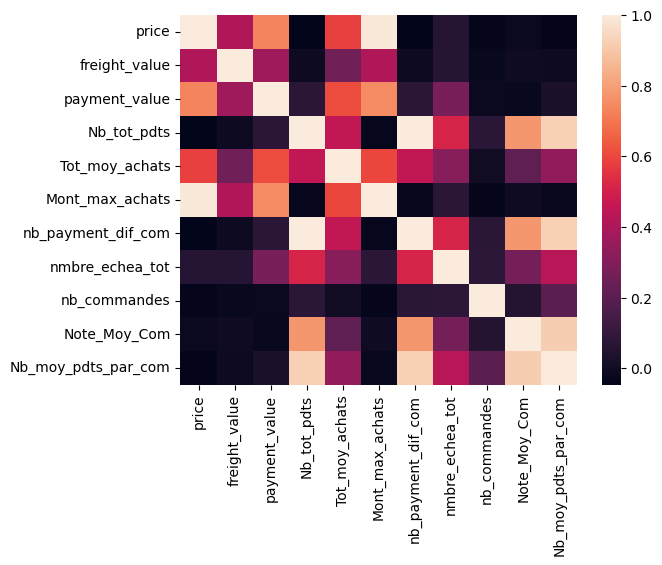

In [266]:
#plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

On voit que :
   * les variables Nb_tot_pdts et nb_payment_dif_com sont correlées ;
   * les variables price et Mont_max_achats sont correlées ;
    

In [236]:
data.to_csv('basefinale.csv')